## Introduction

#### Case Study: Spam Detection
A lot of people lost money because of spam emails. Business lost countless of capital because of spam fraud. With the rate of increase of technology, criminals become smart and it is only reasonable that business match or even be better in this ever increasing crime when it comes to spam detection. In this case, I was provided with the data to detect whether the mail I recieved is either a spam or not. It is a basic logitic problem but it comes with the cost that should I predict that a mail is a spam when infact it's not, the company tends to lose R80 000 and if the mail is not a spam while infact it is, the company lose R1000.

#### Logistic Regression intuition
In statistics, the Logistic Regression model is a widely used statistical model which is primarily used for classification purposes. It means that given a set of observations, Logistic Regression algorithm helps us to classify these observations into two or more discrete classes. So, the target variable is discrete in nature.

####  Assumptions of Logistic Regression

The Logistic Regression model requires several key assumptions. These are as follows:-

* Logistic Regression model requires the dependent variable to be binary, multinomial or ordinal in nature.

* It requires the observations to be independent of each other. So, the observations should not come from repeated measurements.

* Logistic Regression algorithm requires little or no multicollinearity among the independent variables. It means that the independent variables should not be too highly correlated with each other.

* Logistic Regression model assumes linearity of independent variables and log odds.

* The success of Logistic Regression model depends on the sample sizes. Typically, it requires a large sample size to achieve the high accuracy.

## 1. Import libraries|

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
 
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization
%matplotlib inline

# Input data files are available in the home directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk(''):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

In [2]:
import warnings

warnings.filterwarnings('ignore')

## 2. Import dataset

In [3]:
# view dimensions of dataset

data = 'CaseStudyData.csv'

df = pd.read_csv(data)

## 3. Exploratory data analysis

Now, I will explore the data to gain insights about the data.

In [4]:
df.shape

(600, 10)

We can see that there are 600 instances and 10 variables in the data set

In [5]:
# preview the dataset

df.head()

,TargetVariable,Variable1,Variable2,Variable3,Variable4,Variable5,Variable6,Variable7,Variable8,Variable9
0,1,2.357542,29.0,2,10.50,green,4.606326,0,square,0
1,1,2.000362,50.0,2,10.50,green,10.824921,0,round,0
2,0,2.000029,34.0,3,69.55,green,5.861325,8,square,2
3,1,2.020183,50.0,2,10.50,green,10.896444,0,triangle,0
4,0,2.952665,45.0,1,35.50,blue,9.159679,0,triangle,0


In [6]:
col_names = df.columns

col_names

Index(['TargetVariable', 'Variable1', 'Variable2', 'Variable3', 'Variable4',
       'Variable5', 'Variable6', 'Variable7', 'Variable8', 'Variable9'],
      dtype='object')

In [7]:
# view summary of dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 10 columns):
TargetVariable    600 non-null int64
Variable1         600 non-null float64
Variable2         600 non-null float64
Variable3         600 non-null int64
Variable4         600 non-null object
Variable5         600 non-null object
Variable6         600 non-null float64
Variable7         600 non-null int64
Variable8         600 non-null object
Variable9         600 non-null int64
dtypes: float64(3), int64(4), object(3)
memory usage: 47.0+ KB


#### Types of variables

In this section, I segregate the dataset into categorical and numerical variables. There are a mixture of categorical and numerical variables in the dataset. Categorical variables have data type object. Numerical variables have data type float64.

First of all, I will find categorical variables.

In [8]:
# find categorical variables

categorical = [var for var in df.columns if df[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :', categorical)

There are 3 categorical variables

The categorical variables are : ['Variable4', 'Variable5', 'Variable8']


In [9]:
# view the categorical variables

df[categorical].head()

,Variable4,Variable5,Variable8
0,10.50,green,square
1,10.50,green,round
2,69.55,green,square
3,10.50,green,triangle
4,35.50,blue,triangle


#### Summary of categorical variables
There is a date variable. It is denoted by Date column. <br>
There are 6 categorical variables. These are given by Variable4, Variable5, WindDir9am, and Variable8.<br>
There is one binary categorical variable Variable5.<br>
Variable4 just need to be converted to numerical<br>

## Explore problems within categorical variables

First, I will explore the categorical variables.

Missing values in categorical variables

In [10]:
# check missing values in categorical variables

df[categorical].isnull().sum()

Variable4    0
Variable5    0
Variable8    0
dtype: int64

No missing values in the categorical values

#### Frequency counts of categorical variables
Now, I will check the frequency counts of categorical variables.

In [11]:
# view frequency of categorical variables

for var in categorical: 
    
    print(df[var].value_counts())

 8.05       35
 26.00      26
 13.00      26
 7.75       26
 7.90       23
 7.23       18
 10.50      17
 7.25       12
 7.93       12
 26.55      11
 7.78        9
 -           9
 8.66        9
 7.85        8
 9.50        6
 7.05        5
 21.00       5
 14.50       5
 7.88        5
 7.80        5
 27.72       5
 24.15       5
 15.50       5
 14.45       4
 69.55       4
 31.39       4
 26.25       4
 31.28       4
 52.00       4
 15.85       4
            ..
 93.50       1
 20.58       1
 47.10       1
 7.83        1
 30.00       1
 22.53       1
 8.03        1
 6.86        1
 9.22        1
 221.78      1
 7.79        1
 16.00       1
 22.03       1
 23.00       1
 6.75        1
 7.31        1
 12.00       1
 76.73       1
 164.87      1
 15.74       1
 24.00       1
 7.55        1
 6.98        1
 50.00       1
 14.00       1
 69.30       1
 77.96       1
 32.50       1
 26.28       1
 26.39       1
Name: Variable4, Length: 206, dtype: int64
blue     377
green    223
Name: Variable5,

In [12]:
# view frequency distribution of categorical variables

for var in categorical: 
    
    print(df[var].value_counts()/np.float(len(df)))

 8.05       0.058333
 26.00      0.043333
 13.00      0.043333
 7.75       0.043333
 7.90       0.038333
 7.23       0.030000
 10.50      0.028333
 7.25       0.020000
 7.93       0.020000
 26.55      0.018333
 7.78       0.015000
 -          0.015000
 8.66       0.015000
 7.85       0.013333
 9.50       0.010000
 7.05       0.008333
 21.00      0.008333
 14.50      0.008333
 7.88       0.008333
 7.80       0.008333
 27.72      0.008333
 24.15      0.008333
 15.50      0.008333
 14.45      0.006667
 69.55      0.006667
 31.39      0.006667
 26.25      0.006667
 31.28      0.006667
 52.00      0.006667
 15.85      0.006667
              ...   
 93.50      0.001667
 20.58      0.001667
 47.10      0.001667
 7.83       0.001667
 30.00      0.001667
 22.53      0.001667
 8.03       0.001667
 6.86       0.001667
 9.22       0.001667
 221.78     0.001667
 7.79       0.001667
 16.00      0.001667
 22.03      0.001667
 23.00      0.001667
 6.75       0.001667
 7.31       0.001667
 12.00      0

#### Number of labels: cardinality
The number of labels within a categorical variable is known as cardinality. A high number of labels within a variable is known as high cardinality. High cardinality may pose some serious problems in the machine learning model. So, I will check for high cardinality.

In [13]:
# check for cardinality in categorical variables

for var in categorical:
    
    print(var, ' contains ', len(df[var].unique()), ' labels')

Variable4  contains  206  labels
Variable5  contains  2  labels
Variable8  contains  3  labels


We can see that there is a Veriable4 variable which needs to be preprocessed. I will do preprocessing in the following section.

All the other variables contain relatively smaller number of variables.

#### Feature Engineering of Veriable4 Variable

In [14]:
df['Variable4'].dtypes

dtype('O')

We can see that the data type of Variable4 variable is object. I will convert it to numerical

In [15]:
df['Variable4'] = pd.to_numeric(df['Variable4'],errors='coerce')

In [16]:
df['Variable4'].dtypes

dtype('float64')

In [17]:
# again view the summary of dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 10 columns):
TargetVariable    600 non-null int64
Variable1         600 non-null float64
Variable2         600 non-null float64
Variable3         600 non-null int64
Variable4         591 non-null float64
Variable5         600 non-null object
Variable6         600 non-null float64
Variable7         600 non-null int64
Variable8         600 non-null object
Variable9         600 non-null int64
dtypes: float64(4), int64(4), object(2)
memory usage: 47.0+ KB


#### Explore Categorical Variables
Now, I will explore the categorical variables one by one.

In [18]:
# find categorical variables

categorical = [var for var in df.columns if df[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :', categorical)

There are 2 categorical variables

The categorical variables are : ['Variable5', 'Variable8']


We can see that there are 2 categorical variables in the dataset. The Variable4 variable has been converted to numerical.

In [19]:
# check for missing values in categorical variables 

df[categorical].isnull().sum()

Variable5    0
Variable8    0
dtype: int64

No missing values

Now I will explore variable5

In [20]:
# print number of labels in Location variable

print('Variable5 contains', len(df.Variable5.unique()), 'labels')

Variable5 contains 2 labels


In [21]:
# check labels in location variable

df.Variable5.unique()

array(['green', 'blue'], dtype=object)

In [22]:
# check frequency distribution of values in Location variable

df.Variable5.value_counts()

blue     377
green    223
Name: Variable5, dtype: int64

In [23]:
# let's do One Hot Encoding of Variable5 variable
# get k-1 dummy variables after One Hot Encoding 
# preview the dataset with head() method

pd.get_dummies(df.Variable5, drop_first=False).head()

,blue,green
0,0,1
1,0,1
2,0,1
3,0,1
4,1,0


In [24]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df['Variable5'] = le.fit_transform(df['Variable5'])

In [25]:
df['Variable8'] = le.fit_transform(df['Variable8'])

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 10 columns):
TargetVariable    600 non-null int64
Variable1         600 non-null float64
Variable2         600 non-null float64
Variable3         600 non-null int64
Variable4         591 non-null float64
Variable5         600 non-null int32
Variable6         600 non-null float64
Variable7         600 non-null int64
Variable8         600 non-null int32
Variable9         600 non-null int64
dtypes: float64(4), int32(2), int64(4)
memory usage: 42.3 KB


So now all the varible are processed and converted to numerical values

#### Explore Numerical Variables

In [27]:
# find numerical variables

numerical = [var for var in df.columns if df[var].dtype!='O']

print('There are {} numerical variables\n'.format(len(numerical)))

print('The numerical variables are :', numerical)

There are 10 numerical variables

The numerical variables are : ['TargetVariable', 'Variable1', 'Variable2', 'Variable3', 'Variable4', 'Variable5', 'Variable6', 'Variable7', 'Variable8', 'Variable9']


In [28]:
# view the numerical variables

df[numerical].head()

,TargetVariable,Variable1,Variable2,Variable3,Variable4,Variable5,Variable6,Variable7,Variable8,Variable9
0,1,2.357542,29.0,2,10.50,1,4.606326,0,1,0
1,1,2.000362,50.0,2,10.50,1,10.824921,0,0,0
2,0,2.000029,34.0,3,69.55,1,5.861325,8,1,2
3,1,2.020183,50.0,2,10.50,1,10.896444,0,2,0
4,0,2.952665,45.0,1,35.50,0,9.159679,0,2,0


##### Explore problems within numerical variables
Now, I will explore the numerical variables.

###### Missing values in numerical variable

In [29]:
# check missing values in numerical variables

df[numerical].isnull().sum()

TargetVariable    0
Variable1         0
Variable2         0
Variable3         0
Variable4         9
Variable5         0
Variable6         0
Variable7         0
Variable8         0
Variable9         0
dtype: int64

Only varibale4 has missing values which is a small margin, so I will remove them since it is only a small amout.

In [30]:
df = df.dropna()

In [31]:
df[numerical].isnull().sum()

TargetVariable    0
Variable1         0
Variable2         0
Variable3         0
Variable4         0
Variable5         0
Variable6         0
Variable7         0
Variable8         0
Variable9         0
dtype: int64

Now there is no missing values anymore

###### Outliers in numerical variables

In [32]:
# view summary statistics in numerical variables

print(round(df[numerical].describe()),2)

       TargetVariable  Variable1  Variable2  Variable3  Variable4  Variable5  \
count           591.0      591.0      591.0      591.0      591.0      591.0   
mean              0.0        2.0       31.0        2.0       32.0        0.0   
std               0.0        0.0       13.0        1.0       46.0        0.0   
min               0.0        2.0        1.0        1.0        4.0        0.0   
25%               0.0        2.0       22.0        2.0        8.0        0.0   
50%               0.0        2.0       33.0        3.0       15.0        0.0   
75%               1.0        2.0       35.0        3.0       31.0        1.0   
max               1.0        3.0       71.0        3.0      512.0        1.0   

       Variable6  Variable7  Variable8  Variable9  
count      591.0      591.0      591.0      591.0  
mean         6.0        1.0        1.0        0.0  
std          3.0        1.0        1.0        1.0  
min          0.0        0.0        0.0        0.0  
25%          3.0   

In close inpection variable2, and variable4 contains outliers



I will replace outliers with the median

In [33]:
median2 = df.loc[df['Variable2']<35, 'Variable2'].median()
df["Variable2"] = df["Variable2"].mask(df["Variable2"] >35, median2)




In [34]:
median4 = df.loc[df['Variable4']<35, 'Variable4'].median()
df["Variable4"] = df["Variable4"].mask(df["Variable4"] >31, median4)

In [35]:
print(round(df[numerical].describe()),2)

       TargetVariable  Variable1  Variable2  Variable3  Variable4  Variable5  \
count           591.0      591.0      591.0      591.0      591.0      591.0   
mean              0.0        2.0       26.0        2.0       13.0        0.0   
std               0.0        0.0        8.0        1.0        7.0        0.0   
min               0.0        2.0        1.0        1.0        4.0        0.0   
25%               0.0        2.0       22.0        2.0        8.0        0.0   
50%               0.0        2.0       28.0        3.0       10.0        0.0   
75%               1.0        2.0       33.0        3.0       15.0        1.0   
max               1.0        3.0       35.0        3.0       31.0        1.0   

       Variable6  Variable7  Variable8  Variable9  
count      591.0      591.0      591.0      591.0  
mean         6.0        1.0        1.0        0.0  
std          3.0        1.0        1.0        1.0  
min          0.0        0.0        0.0        0.0  
25%          3.0   

No more outliers

## Declare feature vector and target variable

In [36]:
X = df.drop(['TargetVariable'], axis=1)

y = df['TargetVariable']

## Split data into separate training and test set

In [37]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [38]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((472, 9), (119, 9))

## Feature Scaling

In [39]:
X_train.describe()

,Variable1,Variable2,Variable3,Variable4,Variable5,Variable6,Variable7,Variable8,Variable9
count,472.000000,472.000000,472.000000,472.000000,472.000000,472.000000,472.000000,472.000000,472.000000
mean,2.252179,25.939619,2.269068,13.352606,0.381356,5.919039,0.519068,1.004237,0.353814
std,0.291845,7.989029,0.845656,6.818650,0.486235,3.412471,1.070576,0.779231,0.745707
min,2.000000,0.750000,1.000000,4.010000,0.000000,0.045560,0.000000,0.000000,0.000000
25%,2.017481,22.000000,1.000000,8.050000,0.000000,2.965291,0.000000,0.000000,0.000000
50%,2.123703,28.000000,3.000000,10.500000,0.000000,5.862115,0.000000,1.000000,0.000000
75%,2.440011,33.000000,3.000000,15.500000,1.000000,8.609316,1.000000,2.000000,0.000000
max,2.998510,35.000000,3.000000,31.000000,1.000000,11.955890,8.000000,2.000000,5.000000


In [40]:
cols = X_train.columns

In [41]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [42]:
X_train = pd.DataFrame(X_train, columns=[cols])

In [43]:
X_test = pd.DataFrame(X_test, columns=[cols])

In [44]:
X_train.describe()

,Variable1,Variable2,Variable3,Variable4,Variable5,Variable6,Variable7,Variable8,Variable9
count,472.000000,472.000000,472.000000,472.000000,472.000000,472.000000,472.000000,472.000000,472.000000
mean,0.252555,0.735463,0.634534,0.346151,0.381356,0.493142,0.064883,0.502119,0.070763
std,0.292280,0.233256,0.422828,0.252636,0.486235,0.286514,0.133822,0.389615,0.149141
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.017507,0.620438,0.000000,0.149685,0.000000,0.245143,0.000000,0.000000,0.000000
50%,0.123888,0.795620,1.000000,0.240459,0.000000,0.488362,0.000000,0.500000,0.000000
75%,0.440667,0.941606,1.000000,0.425713,1.000000,0.719019,0.125000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


We now have X_train dataset ready to be fed into the Logistic Regression classifier. I will do it as follows.

## Model training

In [45]:
# train a logistic regression model on the training set
from sklearn.linear_model import LogisticRegression


# instantiate the model
logreg = LogisticRegression(solver='liblinear', random_state=0)


# fit the model
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

## Predict results 

In [46]:
y_pred_test = logreg.predict(X_test)

y_pred_test

array([1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

##### predict_proba method 
predict_proba method gives the probabilities for the target variable(0 and 1) in this case, in array form.

0 is for probability of spam and 1 is for probability of spam.

In [47]:
# probability of getting output as 0 - not a spam

logreg.predict_proba(X_test)[:,0]

array([0.11960153, 0.66362266, 0.23635738, 0.89052816, 0.90335974,
       0.8769084 , 0.89766746, 0.83806808, 0.86614989, 0.88135244,
       0.18367124, 0.42398905, 0.11244695, 0.09764695, 0.88318447,
       0.9068002 , 0.90174695, 0.11804071, 0.79928914, 0.90675786,
       0.36422255, 0.89247539, 0.86351678, 0.91255305, 0.41282084,
       0.39467441, 0.29763729, 0.77976148, 0.89022451, 0.94506691,
       0.83643665, 0.71069251, 0.82734594, 0.32420377, 0.89489743,
       0.97482594, 0.79348374, 0.8672537 , 0.91304606, 0.89647754,
       0.91688286, 0.84205825, 0.41320823, 0.86026661, 0.34460772,
       0.85825352, 0.91657123, 0.40053362, 0.11202815, 0.21199636,
       0.91141835, 0.42547442, 0.66822046, 0.80589304, 0.31796433,
       0.86567155, 0.91146046, 0.87715883, 0.07463014, 0.66554662,
       0.28767668, 0.52305992, 0.68035999, 0.83061481, 0.90086705,
       0.0841233 , 0.28667498, 0.91499705, 0.09825079, 0.90640395,
       0.8982806 , 0.40133912, 0.04827845, 0.3955091 , 0.25532

In [48]:
# probability of getting output as 1 - spam

logreg.predict_proba(X_test)[:,1]

array([0.88039847, 0.33637734, 0.76364262, 0.10947184, 0.09664026,
       0.1230916 , 0.10233254, 0.16193192, 0.13385011, 0.11864756,
       0.81632876, 0.57601095, 0.88755305, 0.90235305, 0.11681553,
       0.0931998 , 0.09825305, 0.88195929, 0.20071086, 0.09324214,
       0.63577745, 0.10752461, 0.13648322, 0.08744695, 0.58717916,
       0.60532559, 0.70236271, 0.22023852, 0.10977549, 0.05493309,
       0.16356335, 0.28930749, 0.17265406, 0.67579623, 0.10510257,
       0.02517406, 0.20651626, 0.1327463 , 0.08695394, 0.10352246,
       0.08311714, 0.15794175, 0.58679177, 0.13973339, 0.65539228,
       0.14174648, 0.08342877, 0.59946638, 0.88797185, 0.78800364,
       0.08858165, 0.57452558, 0.33177954, 0.19410696, 0.68203567,
       0.13432845, 0.08853954, 0.12284117, 0.92536986, 0.33445338,
       0.71232332, 0.47694008, 0.31964001, 0.16938519, 0.09913295,
       0.9158767 , 0.71332502, 0.08500295, 0.90174921, 0.09359605,
       0.1017194 , 0.59866088, 0.95172155, 0.6044909 , 0.74467

## Check accuracy score

In [49]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

Model accuracy score: 0.7311


Here, y_test are the true class labels and y_pred_test are the predicted class labels in the test-set.

#### Compare the train-set and test-set accuracy <br>
Now, I will compare the train-set and test-set accuracy to check for overfitting.

In [50]:
y_pred_train = logreg.predict(X_train)

y_pred_train


array([1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1,

In [51]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.8136


#### Check for overfitting and underfitting

In [52]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(logreg.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(logreg.score(X_test, y_test)))

Training set score: 0.8136
Test set score: 0.7311


The training-set accuracy score is 0.8136 while the test-set accuracy to be 0.7311. These two values are quite comparable. So, there is no question of overfitting.

In [53]:
# fit the Logsitic Regression model with C=100

# instantiate the model
logreg100 = LogisticRegression(C=100, solver='liblinear', random_state=0)


# fit the model
logreg100.fit(X_train, y_train)

LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [54]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(logreg100.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(logreg100.score(X_test, y_test)))

Training set score: 0.8093
Test set score: 0.7311


#####  Now, I will investigate, what happens if we use more regularized model than the default value of C=1, by setting C=0.01

In [55]:
# fit the Logsitic Regression model with C=001

# instantiate the model
logreg001 = LogisticRegression(C=0.01, solver='liblinear', random_state=0)


# fit the model
logreg001.fit(X_train, y_train)

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [56]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(logreg001.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(logreg001.score(X_test, y_test)))

Training set score: 0.7839
Test set score: 0.7563


So, if we use more regularized model by setting C=0.01, then both the training set accuracy decreases and test set accuracy increases relatiev to the default parameters. It shows that it reduces overfitting our model

##### Compare model accuracy with null accuracy
So, the model accuracy is 0.8093. But, we cannot say that our model is very good based on the above accuracy. We must compare it with the null accuracy. Null accuracy is the accuracy that could be achieved by always predicting the most frequent class.

So, we should first check the class distribution in the test set.

In [57]:
# check class distribution in test set

y_test.value_counts()

0    77
1    42
Name: TargetVariable, dtype: int64

We can see that the occurences of most frequent class is 77. So, we can calculate null accuracy by dividing 77 by total number of occurences.

In [58]:
# check null accuracy score

null_accuracy = (22067/(22067+6372))

print('Null accuracy score: {0:0.4f}'. format(null_accuracy))

Null accuracy score: 0.7759


We can see that our model accuracy score is 0.8093 but null accuracy score is 0.7759. So, we can conclude that our Logistic Regression model is doing a very good job in predicting the class labels.

Now, based on the above analysis we can conclude that our classification model accuracy is very good. Our model is doing a very good job in terms of predicting the class labels.

But, it does not give the underlying distribution of values. Also, it does not tell anything about the type of errors our classifer is making.

We have another tool called Confusion matrix that comes to our rescue.

## Confusion matrix
A confusion matrix is a tool for summarizing the performance of a classification algorithm. A confusion matrix will give us a clear picture of classification model performance and the types of errors produced by the model. It gives us a summary of correct and incorrect predictions broken down by each category. The summary is represented in a tabular form.
* True Positives (TP) – True Positives occur when we predict an observation belongs to a certain class and the observation actually belongs to that class.

* True Negatives (TN) – True Negatives occur when we predict an observation does not belong to a certain class and the observation actually does not belong to that class.

* False Positives (FP) – False Positives occur when we predict an observation belongs to a certain class but the observation actually does not belong to that class. This type of error is called Type I error.

* False Negatives (FN) – False Negatives occur when we predict an observation does not belong to a certain class but the observation actually belongs to that class. This is a very serious error and it is called Type II error.

These four outcomes are summarized in a confusion matrix given below.

In [59]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_test)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[61 16]
 [16 26]]

True Positives(TP) =  61

True Negatives(TN) =  26

False Positives(FP) =  16

False Negatives(FN) =  16


The confusion matrix shows 61 + 26 = 87 correct predictions and 16 + 16 = 32 incorrect predictions.

In this case, we have

* True Positives (Actual Positive:1 and Predict Positive:1) - 61
* True Negatives (Actual Negative:0 and Predict Negative:0) - 32
* False Positives (Actual Negative:0 but Predict Positive:1) - 16 (Type I error)
* False Negatives (Actual Positive:1 but Predict Negative:0) - 16 (Type II error)

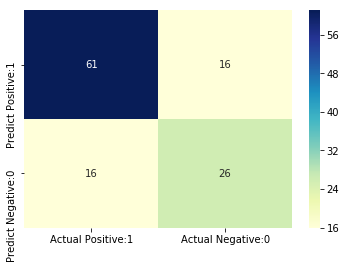

In [60]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

## Classification metrices

### Classification Report
Classification report is another way to evaluate the classification model performance. It displays the precision, recall, f1 and support scores for the model. I have described these terms in later.

We can print a classification report as follows:-

In [61]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.79      0.79      0.79        77
           1       0.62      0.62      0.62        42

    accuracy                           0.73       119
   macro avg       0.71      0.71      0.71       119
weighted avg       0.73      0.73      0.73       119



### Classification accuracy

In [62]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [63]:
# print classification accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.7311


### Classification error

In [64]:
# print classification error

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.2689


#### Precision
Precision can be defined as the percentage of correctly predicted positive outcomes out of all the predicted positive outcomes. It can be given as the ratio of true positives (TP) to the sum of true and false positives (TP + FP).

So, Precision identifies the proportion of correctly predicted positive outcome. It is more concerned with the positive class than the negative class.

Mathematically, precision can be defined as the ratio of TP to (TP + FP).

In [65]:
# print precision score

precision = TP / float(TP + FP)


print('Precision : {0:0.4f}'.format(precision))

Precision : 0.7922


#### Recall
Recall can be defined as the percentage of correctly predicted positive outcomes out of all the actual positive outcomes. It can be given as the ratio of true positives (TP) to the sum of true positives and false negatives (TP + FN). Recall is also called Sensitivity.

Recall identifies the proportion of correctly predicted actual positives.

Mathematically, recall can be given as the ratio of TP to (TP + FN).

In [66]:
recall = TP / float(TP + FN)

print('Recall or Sensitivity : {0:0.4f}'.format(recall))

Recall or Sensitivity : 0.7922


#### True Positive Rate
True Positive Rate is synonymous with Recall.

In [67]:
true_positive_rate = TP / float(TP + FN)


print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))

True Positive Rate : 0.7922


#### False Positive Rate

In [68]:
false_positive_rate = FP / float(FP + TN)


print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))

False Positive Rate : 0.3810


#### Specificity

In [69]:
specificity = TN / (TN + FP)

print('Specificity : {0:0.4f}'.format(specificity))

Specificity : 0.6190


#### f1-score
f1-score is the weighted harmonic mean of precision and recall. The best possible f1-score would be 1.0 and the worst would be 0.0. f1-score is the harmonic mean of precision and recall. So, f1-score is always lower than accuracy measures as they embed precision and recall into their computation. The weighted average of f1-score should be used to compare classifier models, not global accuracy.

#### Support
Support is the actual number of occurrences of the class in our dataset.

## Adjusting the threshold level 

In [70]:
# print the first 10 predicted probabilities of two classes- 0 and 1

y_pred_prob = logreg.predict_proba(X_test)[0:10]

y_pred_prob

array([[0.11960153, 0.88039847],
       [0.66362266, 0.33637734],
       [0.23635738, 0.76364262],
       [0.89052816, 0.10947184],
       [0.90335974, 0.09664026],
       [0.8769084 , 0.1230916 ],
       [0.89766746, 0.10233254],
       [0.83806808, 0.16193192],
       [0.86614989, 0.13385011],
       [0.88135244, 0.11864756]])

#### Observations
* In each row, the numbers sum to 1.
* There are 2 columns which correspond to 2 classes - 0 and 1.

    * Class 0 - predicted probability that there is no spam.

    * Class 1 - predicted probability that there is spam.

* Importance of predicted probabilities
    * We can rank the observations by probability of spam or no spam.
* predict_proba process
    * Predicts the probabilities
    * Choose the class with the highest probability

* Classification threshold level

    * There is a classification threshold level of 0.5.

    * Class 1 - probability of rain is predicted if probability > 0.5.

    * Class 0 - probability of no rain is predicted if probability < 0.5.

In [71]:
# store the probabilities in dataframe

y_pred_prob_df = pd.DataFrame(data=y_pred_prob, columns=['Prob of - No spam (0)', 'Prob of - spam (1)'])

y_pred_prob_df

,Prob of - No spam (0),Prob of - spam (1)
0,0.119602,0.880398
1,0.663623,0.336377
2,0.236357,0.763643
3,0.890528,0.109472
4,0.903360,0.096640
5,0.876908,0.123092
6,0.897667,0.102333
7,0.838068,0.161932
8,0.866150,0.133850
9,0.881352,0.118648


In [72]:
# print the first 10 predicted probabilities for class 1 - Probability of spam

logreg.predict_proba(X_test)[0:10, 1]

array([0.88039847, 0.33637734, 0.76364262, 0.10947184, 0.09664026,
       0.1230916 , 0.10233254, 0.16193192, 0.13385011, 0.11864756])

In [73]:
# store the predicted probabilities for class 1 - Probability of rain

y_pred1 = logreg.predict_proba(X_test)[:, 1]

Text(0, 0.5, 'Frequency')

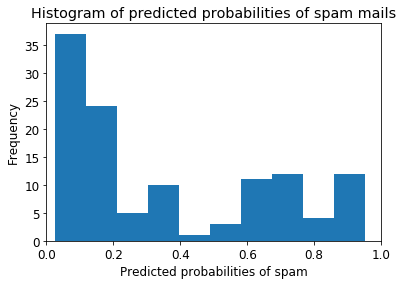

In [74]:
# plot histogram of predicted probabilities


# adjust the font size 
plt.rcParams['font.size'] = 12


# plot histogram with 10 bins
plt.hist(y_pred1, bins = 10)


# set the title of predicted probabilities
plt.title('Histogram of predicted probabilities of spam mails')


# set the x-axis limit
plt.xlim(0,1)


# set the title
plt.xlabel('Predicted probabilities of spam')
plt.ylabel('Frequency')

#### Observations
* We can see that the above histogram is highly positive skewed.
* The first column tell us that there are approximately 37 observations with probability between 0.0 and 0.1.
* There are small number of observations with probability > 0.5.
* So, these small number of observations predict that there will be spam.
* Majority of observations predict that there will be no spam.

## ROC - AUC 

#### ROC Curve
Another tool to measure the classification model performance visually is ROC Curve. ROC Curve stands for Receiver Operating Characteristic Curve. An ROC Curve is a plot which shows the performance of a classification model at various classification threshold levels.

The ROC Curve plots the True Positive Rate (TPR) against the False Positive Rate (FPR) at various threshold levels.

True Positive Rate (TPR) is also called Recall. It is defined as the ratio of TP to (TP + FN).

False Positive Rate (FPR) is defined as the ratio of FP to (FP + TN).

In the ROC Curve, we will focus on the TPR (True Positive Rate) and FPR (False Positive Rate) of a single point. This will give us the general performance of the ROC curve which consists of the TPR and FPR at various threshold levels. So, an ROC Curve plots TPR vs FPR at different classification threshold levels. If we lower the threshold levels, it may result in more items being classified as positve. It will increase both True Positives (TP) and False Positives (FP).

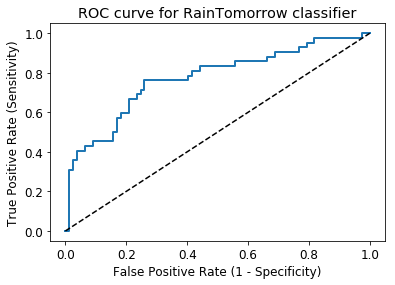

In [81]:
# plot ROC Curve

from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred1)

plt.figure(figsize=(6,4))

plt.plot(fpr, tpr, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12

plt.title('ROC curve for RainTomorrow classifier')

plt.xlabel('False Positive Rate (1 - Specificity)')

plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

ROC curve help us to choose a threshold level that balances sensitivity and specificity for a particular context.

#### ROC-AUC
ROC AUC stands for Receiver Operating Characteristic - Area Under Curve. It is a technique to compare classifier performance. In this technique, we measure the area under the curve (AUC). A perfect classifier will have a ROC AUC equal to 1, whereas a purely random classifier will have a ROC AUC equal to 0.5.

So, ROC AUC is the percentage of the ROC plot that is underneath the curve.

In [82]:
# compute ROC AUC

from sklearn.metrics import roc_auc_score

ROC_AUC = roc_auc_score(y_test, y_pred1)

print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 0.7715


##### Comments
ROC AUC is a single number summary of classifier performance. The higher the value, the better the classifier.

ROC AUC of our model approaches towards 1. So, we can conclude that our classifier does a good job in predicting whether a mail is a spam or not.

In [83]:
# calculate cross-validated ROC AUC 

from sklearn.model_selection import cross_val_score

Cross_validated_ROC_AUC = cross_val_score(logreg, X_train, y_train, cv=5, scoring='roc_auc').mean()

print('Cross validated ROC AUC : {:.4f}'.format(Cross_validated_ROC_AUC))

Cross validated ROC AUC : 0.8599


## k-Fold Cross Validation

In [84]:
# Applying 5-Fold Cross Validation

from sklearn.model_selection import cross_val_score

scores = cross_val_score(logreg, X_train, y_train, cv = 5, scoring='accuracy')

print('Cross-validation scores:{}'.format(scores))

Cross-validation scores:[0.82105263 0.8        0.81052632 0.79787234 0.80645161]


We can summarize the cross-validation accuracy by calculating its mean.

In [85]:
# compute Average cross-validation score

print('Average cross-validation score: {:.4f}'.format(scores.mean()))

Average cross-validation score: 0.8072


Our, original model score is found to be 0.8093. The average cross-validation score is 0.8072. So, we can conclude that cross-validation does not result in performance improvement.

## Hyperparameter Optimization using GridSearch CV 

In [86]:
from sklearn.model_selection import GridSearchCV


parameters = [{'penalty':['l1','l2']}, 
              {'C':[1, 10, 100, 1000]}]



grid_search = GridSearchCV(estimator = logreg,  
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5,
                           verbose=0)


grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=0, solver='liblinear',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid=[{'penalty': ['l1', 'l2']}, {'C': [1, 10, 100, 1000]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [87]:
# examine the best model

# best score achieved during the GridSearchCV
print('GridSearch CV best score : {:.4f}\n\n'.format(grid_search.best_score_))

# print parameters that give the best results
print('Parameters that give the best results :','\n\n', (grid_search.best_params_))

# print estimator that was chosen by the GridSearch
print('\n\nEstimator that was chosen by the search :','\n\n', (grid_search.best_estimator_))

GridSearch CV best score : 0.8136


Parameters that give the best results : 

 {'C': 10}


Estimator that was chosen by the search : 

 LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)


In [88]:
# calculate GridSearch CV score on test set

print('GridSearch CV score on test set: {0:0.4f}'.format(grid_search.score(X_test, y_test)))

GridSearch CV score on test set: 0.7311


##### Comments
Our original model test accuracy is 0.7311 while GridSearch CV accuracy is 0.7311.
We can see that GridSearch CV doesn't also improve the performance for this particular model.

## Results and conclusion

* The logistic regression model accuracy score is 0.8093. So, the model does a very good job in predicting whether or not the email is a spam.

* Small number of observations predict that there will be there is spam. Majority of observations predict that the mail is not a spam.

* The model shows no signs of overfitting.

* Increasing the value of C results in higher test set accuracy and also a slightly increased training set accuracy. So, we can conclude that a more complex model should perform better.

* Increasing the threshold level results in increased accuracy.

* ROC AUC of our model approaches towards 1. So, we can conclude that our classifier does a good job in predicting whether the mail is a spam or not.

* Our original model accuracy score is 0.8093 whereas accuracy score after RFECV is 0.8070. So, we can obtain approximately similar accuracy but with reduced set of features.

* In the original model, we have FP = 16 whereas FP1 = 16. So, we get approximately same number of false positives. Also, FN = 16 whereas FN1 = 15. So, we get slighly same false negatives.

* Our, original model score is found to be 0.8093. The average cross-validation score is 0.8072. So, we can conclude that cross-validation does not result in performance improvement.

* Our original model test accuracy is 0.7311 while GridSearch CV accuracy is 0.7311. We can see that GridSearch CV does not also improve the performance for this particular model.